### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline
from keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.9.1


## Applying cnn 5 layer to feature visulization

In [3]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.utils import load_img
# from keras.utils import img_to_array
# from keras.models import Model
# from matplotlib import pyplot
# from numpy import expand_dims
# # load the model
# # redefine model to output right after the first hidden layer
# model = Model(inputs=model.inputs, outputs=model.layers[1].output)
# model.summary()
# # load the image with the required shape
# img = load_img("train/sad/Training_23814.jpg")
# # convert the image to an array
# img = img_to_array(img)
# # expand dimensions so that it represents a single 'sample'
# img = expand_dims(img, axis=0)
# # prepare the image (e.g. scale pixel values for the vgg)
# img = preprocess_input(img)
# # get feature map for first hidden layer
# feature_maps = model.predict(img)
# # plot all 64 maps in an 8x8 squares
# square = 8
# ix = 1
# for _ in range(square):
# 	for _ in range(square):
# 		# specify subplot and turn of axis
# 		ax = pyplot.subplot(square, square, ix)
# 		ax.set_xticks([])
# 		ax.set_yticks([])
# 		# plot filter channel in grayscale
# 		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
# 		ix += 1
# # show the figure
# pyplot.show()

In [4]:
import numpy as np
import random
from keras.utils import img_to_array, load_img

img_path='PrivateTest_731447.jpg'

img = load_img(img_path, target_size=(48, 48))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (48, 48, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 48, 48, 3)

# Rescale by 1/255
x /= 255.0
y_pred=model.predict(x)
#_pred =(y_pred>0.5)
print(y_pred)

def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 3s 3s/step
[[0.15022805 0.14248084 0.14342983 0.14259103 0.14256823 0.13784426
  0.14085771]]


conv2d (3, 3, 3, 64)
64


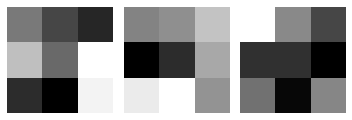

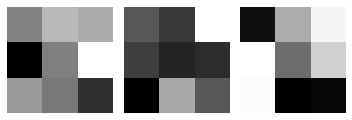

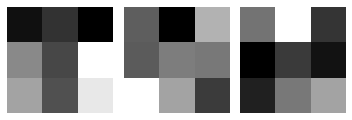

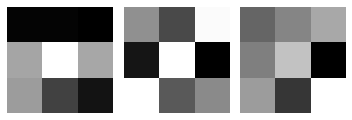

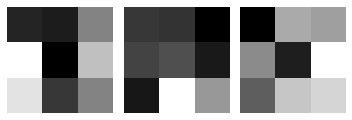

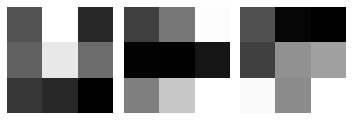

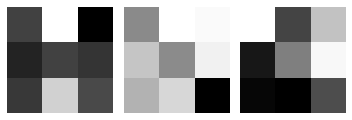

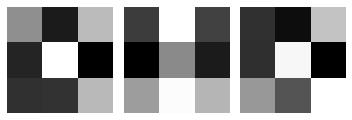

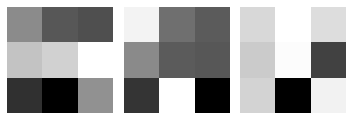

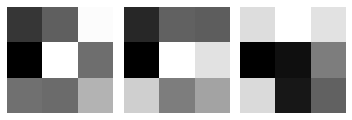

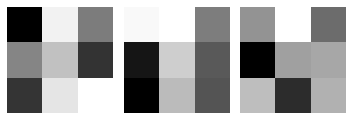

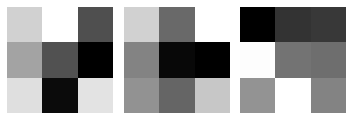

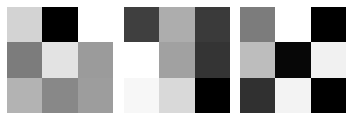

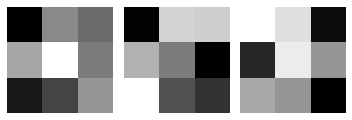

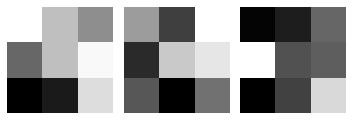

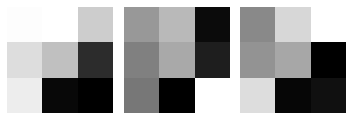

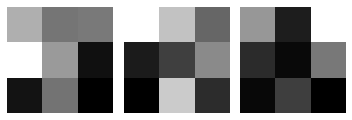

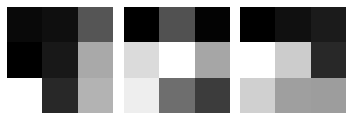

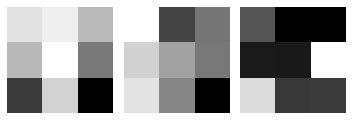

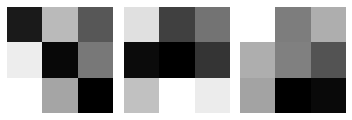

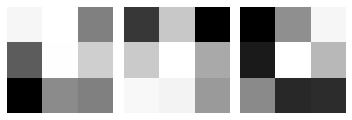

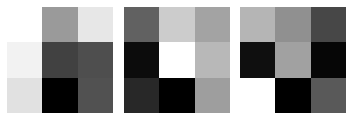

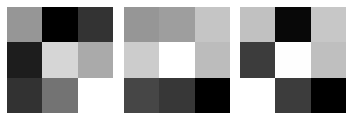

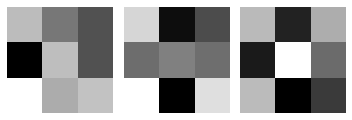

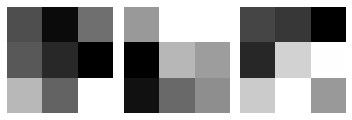

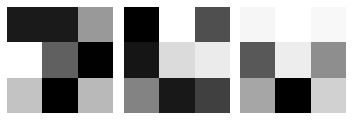

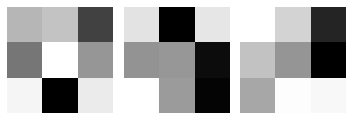

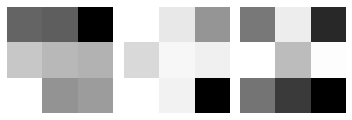

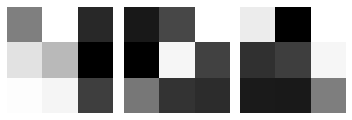

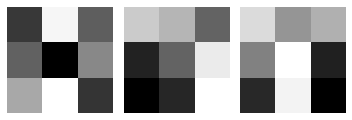

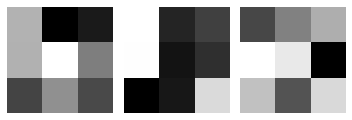

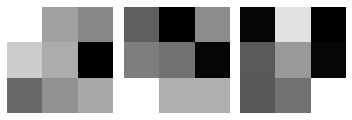

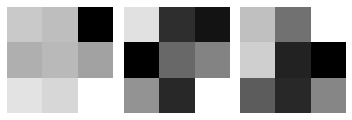

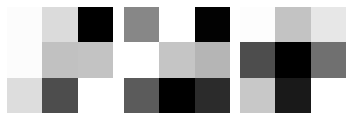

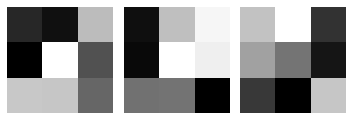

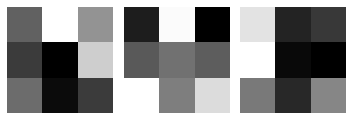

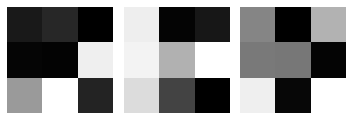

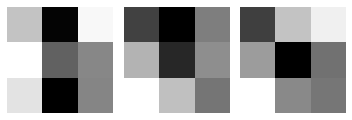

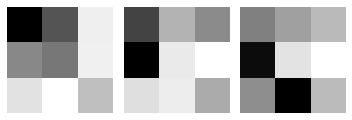

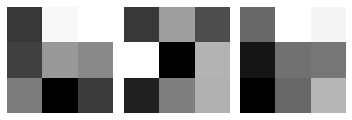

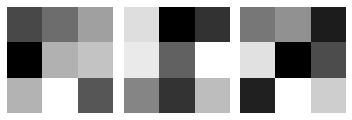

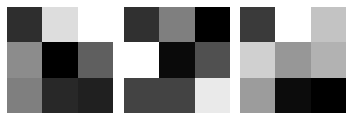

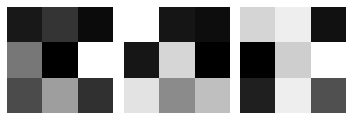

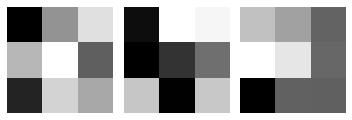

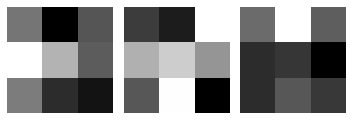

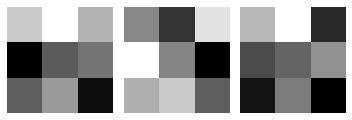

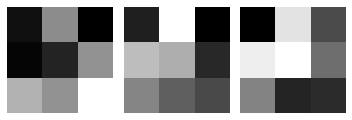

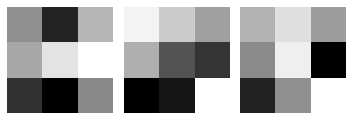

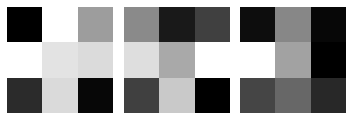

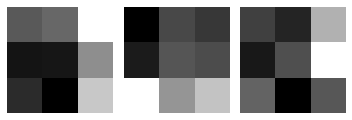

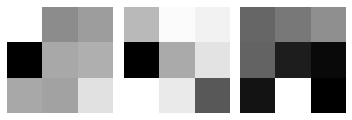

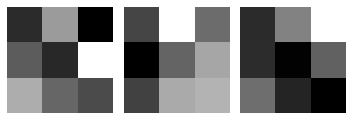

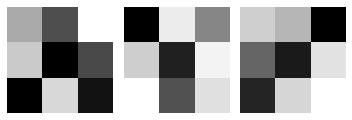

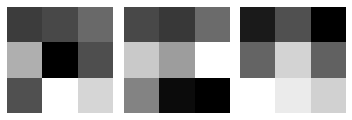

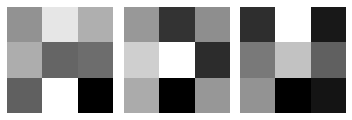

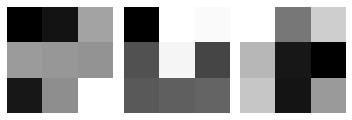

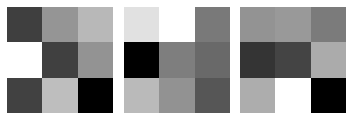

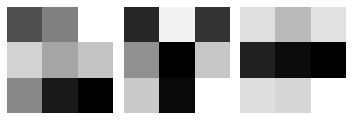

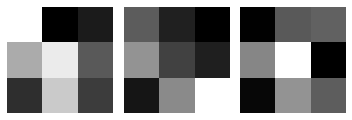

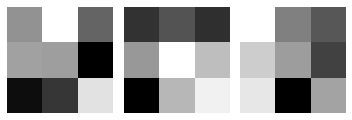

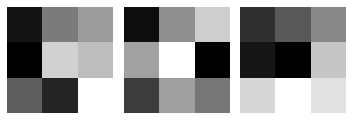

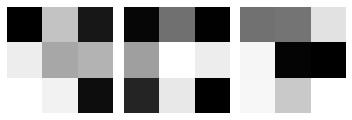

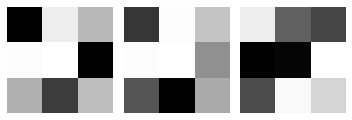

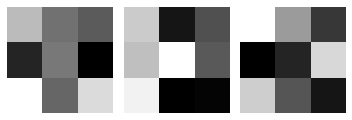

conv2d_1 (5, 5, 64, 128)
128


conv2d_2 (3, 3, 128, 512)
512


conv2d_3 (3, 3, 512, 512)
512


In [5]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

1/1 [==============================] - 0s 190ms/step
(1, 48, 48, 64)
(1, 48, 48, 64)
(1, 24, 24, 64)
(1, 24, 24, 64)
(1, 24, 24, 128)
(1, 24, 24, 128)
(1, 24, 24, 128)
(1, 12, 12, 128)
(1, 12, 12, 128)
(1, 12, 12, 512)


C:\Users\xu842\AppData\Local\Temp\ipykernel_13420\1798285774.py:53: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


(1, 12, 12, 512)
(1, 12, 12, 512)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 3, 3, 512)
(1, 3, 3, 512)
(1, 4608)
(1, 256)
(1, 256)
(1, 256)
(1, 256)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 7)


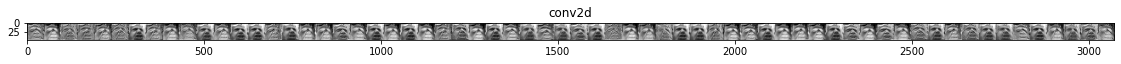

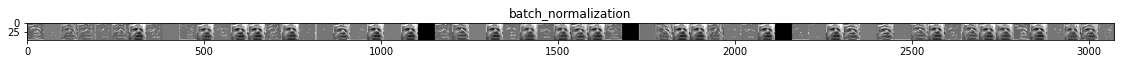

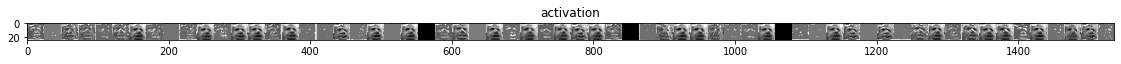

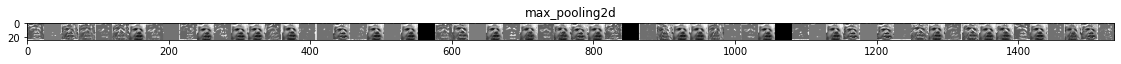

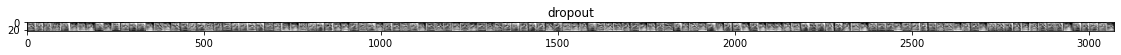

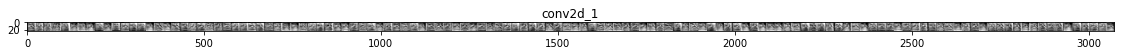

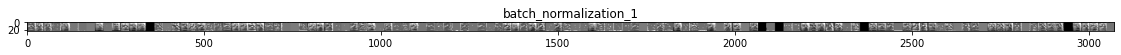

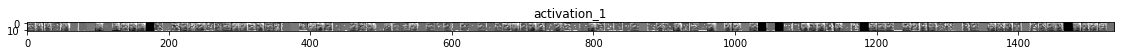

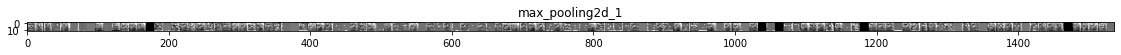

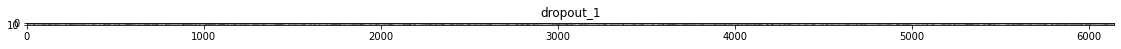

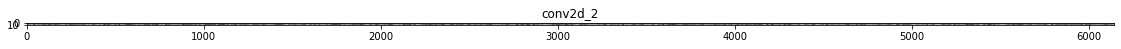

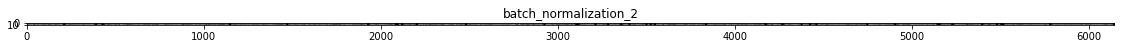

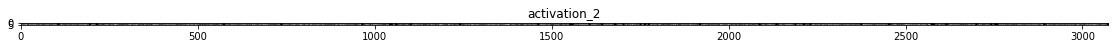

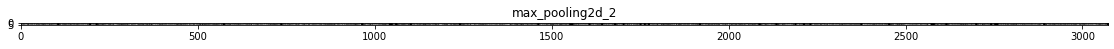

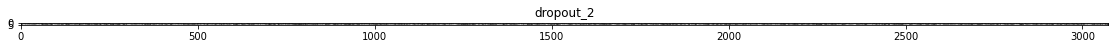

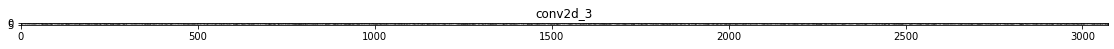

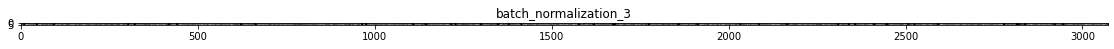

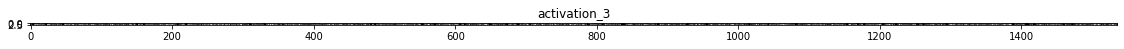

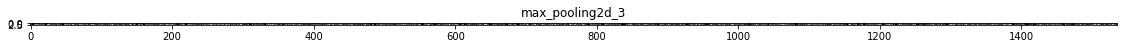

In [6]:
img_path='PrivateTest_731447.jpg'
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
#cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
#dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

#img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(48, 48))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

     #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow(display_grid, aspect='equal', cmap='gray')